## [Netflix Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download)

In [2]:
#STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Style
sns.set(style="whitegrid")

In [3]:

df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#STEP 4: Explore and clean nulls
print("Null value summary:")
print(df.isnull().sum())

#Fill or drop nulls
df['country'].fillna("Unknown", inplace=True)
df['director'].fillna("Not Specified", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)  # Forward fill

#Still missing?
print("\nCleaned nulls:")
print(df.isnull().sum())


Null value summary:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

Cleaned nulls:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64


/tmp/ipython-input-6-3643559661.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'].fillna(method='ffill', inplace=True)  # Forward fill


/tmp/ipython-input-7-2266923875.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


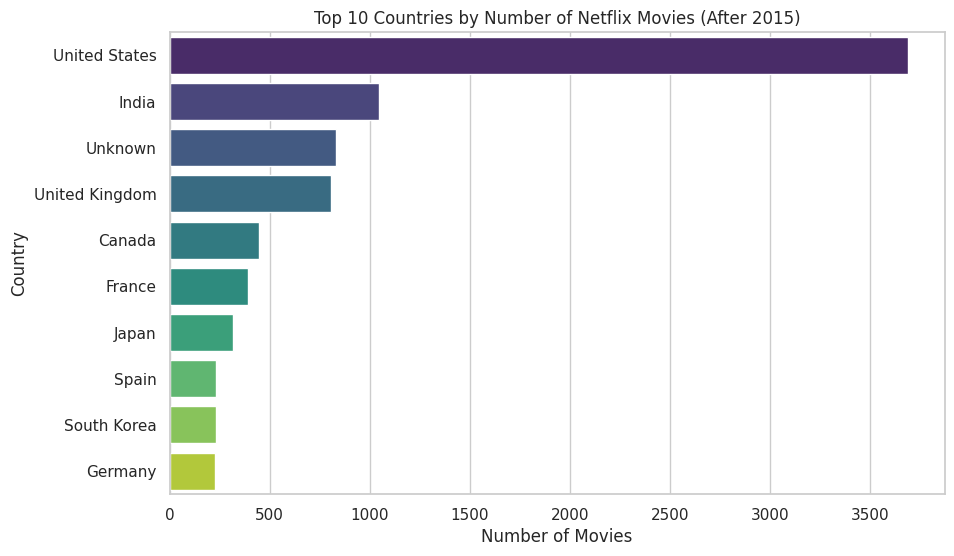

In [7]:
#STEP 6: Plot number of movies per country
#Split multiple countries (e.g., "United States, Canada") into rows

df_expanded = df.assign(country=df['country'].str.split(',')).explode('country')
df_expanded['country'] = df_expanded['country'].str.strip()

#Count and plot
top_countries = df_expanded['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Netflix Movies (After 2015)")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()
